<a href="https://colab.research.google.com/github/842Mono/CSEN1067_Machine_Learning_Project1/blob/master/Final_Project2ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function

from time import time
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from array import *



##**Task 1**

In [29]:
print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(funneled=True,min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape
# print(h,w)

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
X = preprocessing.StandardScaler().fit_transform(X)
# print(X)

n_features = X.shape[1]
# print(X.shape)
# print(n_features)

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
# print(y)
# print(y.shape)
# print(target_names)

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Automatically created module for IPython interactive environment
Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [0]:
# #############################################################################
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=42)



In [31]:
# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
# print(pca)


print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))
print("eigenfaces = ",eigenfaces.shape)
# print("eigenfaces = ",eigenfaces[0])

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance')


print("Done.....")

Extracting the top 150 eigenfaces from 966 faces
done in 0.363s
eigenfaces =  (150, 50, 37)
Projecting the input data on the eigenfaces orthonormal basis
done in 0.041s
Done.....


##Part 1

In [32]:
#task 1-part 1
# #############################################################################
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1, 10, 100, 1e3],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)
print("Done.....")




Fitting the classifier to the training set
done in 58.841s
Best estimator found by grid search:
SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Done.....


In [33]:
# #############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print("-------")
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

print("Done.....")

Predicting people's names on the test set
done in 0.076s
                   precision    recall  f1-score   support

     Ariel Sharon       0.53      0.69      0.60        13
     Colin Powell       0.75      0.87      0.81        60
  Donald Rumsfeld       0.77      0.74      0.75        27
    George W Bush       0.96      0.91      0.93       146
Gerhard Schroeder       0.84      0.84      0.84        25
      Hugo Chavez       0.83      0.67      0.74        15
       Tony Blair       0.88      0.83      0.86        36

      avg / total       0.86      0.85      0.86       322

-------
[[  9   2   2   0   0   0   0]
 [  2  52   3   2   0   1   0]
 [  2   3  20   1   0   1   0]
 [  3   5   1 133   2   0   2]
 [  0   2   0   1  21   0   1]
 [  0   3   0   1   0  10   1]
 [  1   2   0   1   2   0  30]]
Done.....


##** Part 2 **
*Large Value of parameter C let to small margin and smooth, On the other hand,  Small Value of paramerter C let to Large margin, Our aim is Maximize the margin as much as possible, but in our case we used  gridsearchCV, in which it will tell you which value is best.*

In [34]:
# Task 1-part 2
# # Create the Scaler object
X_scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
# # Fit your data on the scaler object
scaled_df = X_scaler.fit_transform(X_train)
#print(scaled_df)

print("Fitting the classifier to the training set")
t0 = time()
param_grid_SVC = {'C': [1, 10, 100, 1e3],
                  'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf_SVC = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                           param_grid_SVC, cv=5)

clf_SVC = clf_SVC.fit(scaled_df, y_train)

print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf_SVC.best_estimator_)
print("Done.....")

Fitting the classifier to the training set
done in 692.765s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Done.....


####Define func_pca function, 
*This function takes train sets and test sets then, Operates the PCA looping on number of components  [50, 150, 190, 300, 700] and return n_components, c_array, train_set, average, eigenfaces_array, predict_array*

In [0]:
# n_components =  [50, 150, 190, 300, 700]
def func_pca(components,Xtrain,Xtest,Ytrain,Ytest):
  n_components =  components
  c_array = []
  train_set = []
  average =[]
  eigenfaces_array = []
  predict_array = []

  for i in range(len(n_components)):
    print("Extracting the top %d eigenfaces from %d faces"
          % (n_components[i], Xtrain.shape[0]))
    t0 = time()
    pca = PCA(n_components = n_components[i], svd_solver='randomized',
              whiten=True).fit(Xtrain)
    # print(pca)
    #print("done in %0.3fs" % (time() - t0))
    sum_all=0
    match=0

    eigenfaces = pca.components_.reshape((n_components[i], h, w))
#     print("eigenfaces = ",eigenfaces.shape)
    eigenfaces_array.append(eigenfaces)
    # print("eigenfaces = ",eigenfaces[0])

#     print("Projecting the input data on the eigenfaces orthonormal basis")
    t0 = time()
    x_train_pca = pca.transform(Xtrain)
    x_test_pca = pca.transform(Xtest)
  #   print("done in %0.3fs" % (time() - t0))
  #   print("x_test_pca",len(x_test_pca))


    t0 = time()
    param_grid = {'C': [1, 10, 100, 1e3],
                  'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
    clf_new = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                               param_grid, cv=5)

    clf_new = clf_new.fit(x_train_pca, Ytrain)

    y_pred_new = clf_new.predict(x_test_pca)
#     print(clf_new)
    predict_array.append(y_pred_new)
  #   print("y_pred_new",len(y_pred_new))
  #   print("y_test",len(y_test))

    #calculate accuracy
    for ii in range(0,len(y_pred_new)):
      sum_all=len(y_pred_new)
      if y_pred_new[ii]==Ytest[ii]:
        match+=1
    average.append(match/sum_all) 
#     print("average :",average)



   
#     print("Best estimator found by grid search:")
  #   print(clf.best_estimator_)
    c_value = clf_new.best_estimator_.C
    c_array.append(c_value)
    print(c_value)
#   print("c_array",c_array)
#   print("average :",average)
#   print("predict_array :",predict_array)
#   print("eigenfaces_array :",eigenfaces_array)
  # print("train_set",train_set)
  # print('clf_new : ',clf_new)
  print("done in %0.3fs" % (time() - t0))
  print("Done.....")
  return n_components,c_array,average,predict_array,eigenfaces_array



##Part 3

In [36]:
components =  [50, 150, 190, 300, 700]
values = func_pca(components,X_train, X_test, y_train, y_test)


Extracting the top 50 eigenfaces from 966 faces
10
Extracting the top 150 eigenfaces from 966 faces
10
Extracting the top 190 eigenfaces from 966 faces
10
Extracting the top 300 eigenfaces from 966 faces
10
Extracting the top 700 eigenfaces from 966 faces
100
done in 290.422s
Done.....


In [0]:
n_components = values[0]
c_array = values[1]
average = values[2]
predict_array = values[3]
eigenfaces_array = values[4]



In [38]:
print("n_components",n_components)
print("c_array",c_array)
print("performance :",average)
# print("predict_array :",predict_array)
# print("eigenfaces_array :",eigenfaces_array)

n_components [50, 150, 190, 300, 700]
c_array [10, 10, 10, 10, 100]
performance : [0.8478260869565217, 0.8509316770186336, 0.8540372670807453, 0.7919254658385093, 0.6677018633540373]


2018-12-02 21:47:12,764 No handles with labels found to put in legend.


Text(0.5,1,'graph 1')

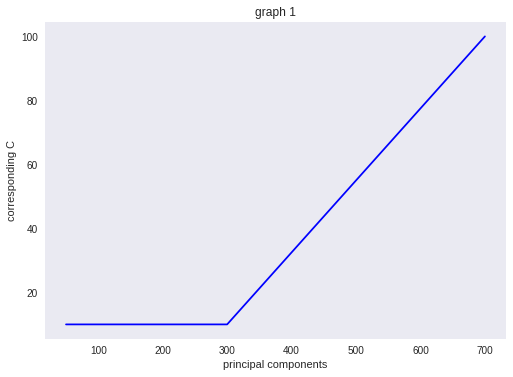

In [39]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])

plt.plot(n_components[:], c_array[:],c='b')
ax.grid()
ax.legend(loc='best')
ax.set_xlabel('principal components')
ax.set_ylabel('corresponding C')
ax.set_title('graph 1')
  


2018-12-02 21:47:12,964 No handles with labels found to put in legend.


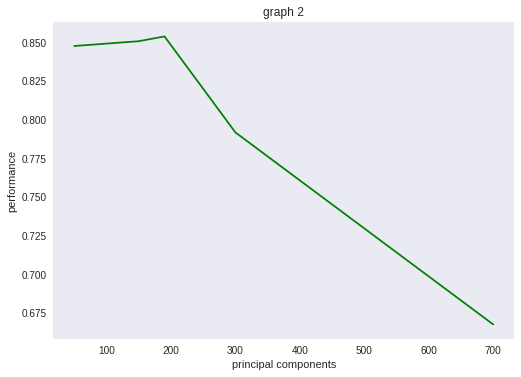

In [40]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])

plt.plot(n_components[:],average[:],c='g')
ax.grid()
ax.legend(loc='best')
ax.set_xlabel('principal components')
ax.set_ylabel('performance')
ax.set_title('graph 2')
  
plt.show()

##Part 4
#####Report on the change in performance you observe. What causes the performance to change with respect to the number of principal components in this particular manner?
*Answer ......*

In [0]:
# #############################################################################
# Qualitative evaluation of the predictions using matplotlib
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)



##Part 5

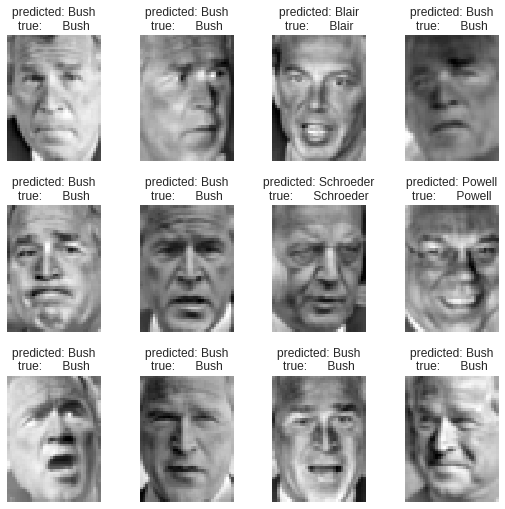

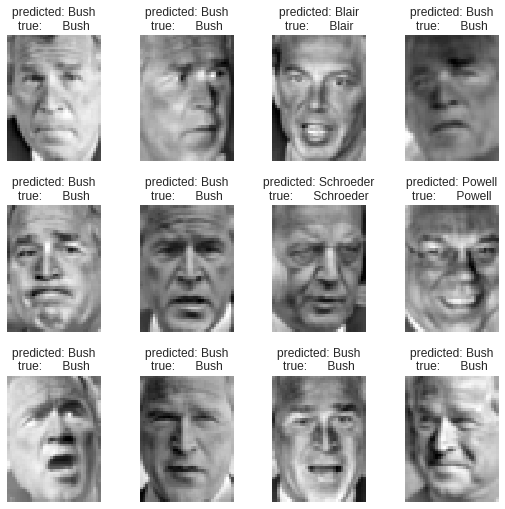

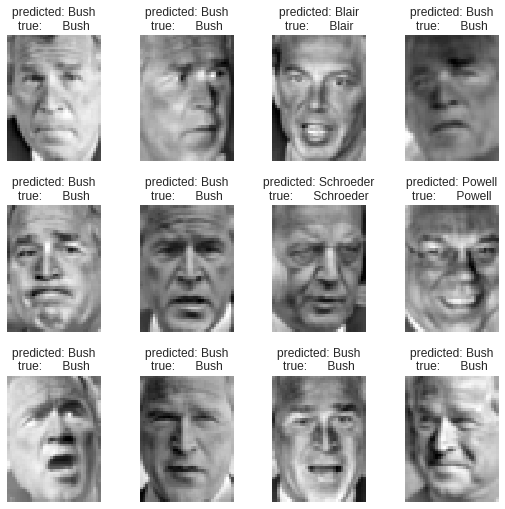

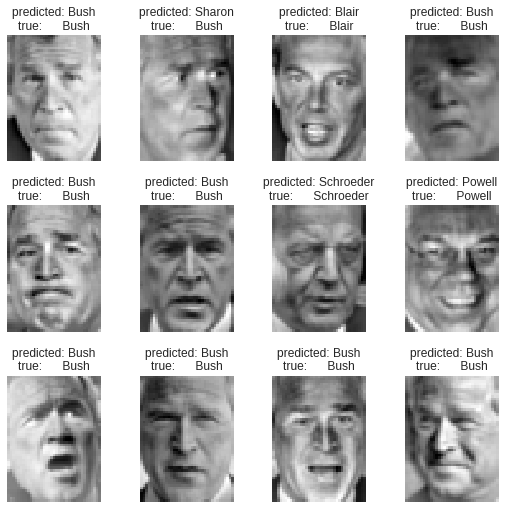

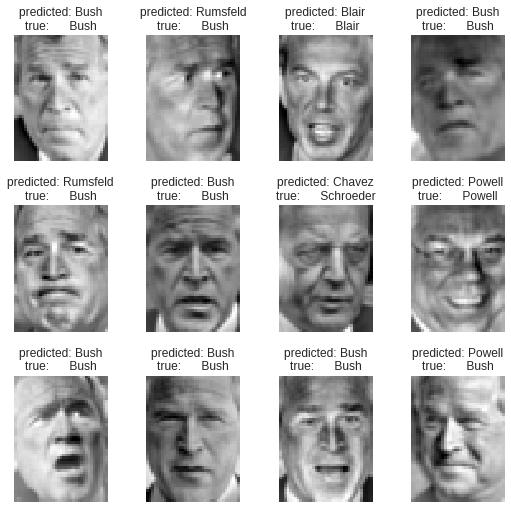

In [42]:
for j in range(len(predict_array)):
  prediction_titles_new = [title(predict_array[j], y_test, target_names, i)
                           for i in range(predict_array[j].shape[0])]

  plot_gallery(X_test, prediction_titles_new, h, w)


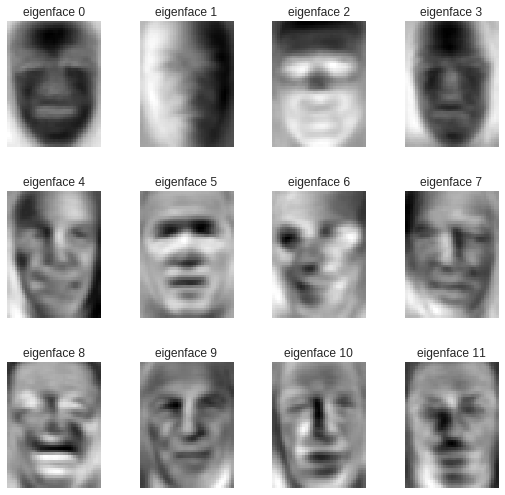

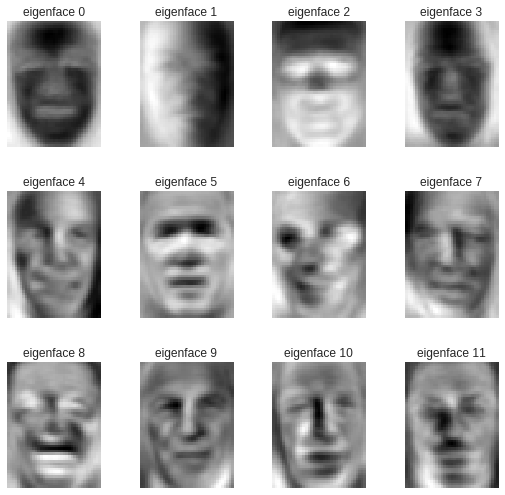

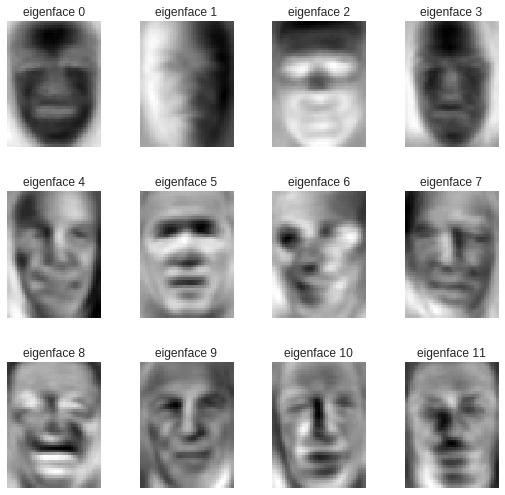

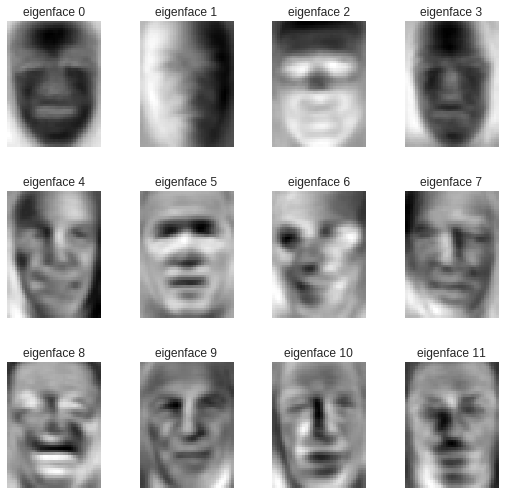

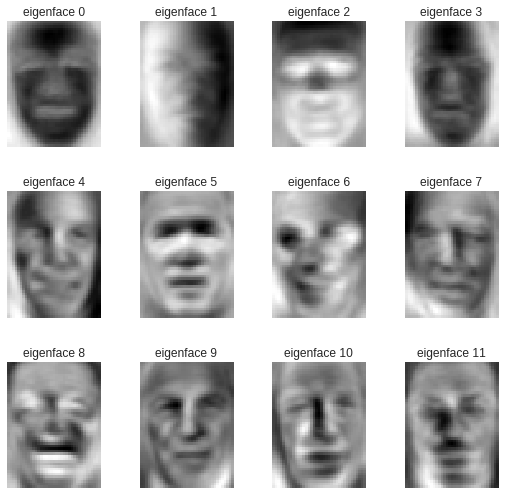

In [43]:
# plot the gallery of the most significative eigenfaces
for j in range(len(eigenfaces_array)):
  eigenface_titles_new = ["eigenface %d" % i for i in range(eigenfaces[j].shape[0])]
  plot_gallery(eigenfaces_array[j], eigenface_titles_new, h, w)

plt.show()

##Part  6

In [44]:
#unfunneled

print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

un_lfw_people = fetch_lfw_people(funneled=False,min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
un_n_samples, hh, ww = un_lfw_people.images.shape


# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X_un_lfw = un_lfw_people.data
X_un_lfw = preprocessing.StandardScaler().fit_transform(X_un_lfw)


un_n_features = X_un_lfw.shape[1]


# the label to predict is the id of the person
y_un_lfw = un_lfw_people.target
target_names = un_lfw_people.target_names
un_n_classes = target_names.shape[0]


print("Total dataset size:")
print("n_samples: %d" % un_n_samples)
print("n_features: %d" % un_n_features)
print("n_classes: %d" % un_n_classes)

# split into a training and testing set
un_X_train, un_X_test, un_y_train, un_y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=42)


2018-12-02 21:47:20,244 Downloading LFW data (~200MB): https://ndownloader.figshare.com/files/5976018


Automatically created module for IPython interactive environment


/usr/local/lib/python3.6/dist-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/usr/local/lib/python3.6/dist-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/usr/local/lib/python3.6/dist-packages/sklearn/datasets/lfw.py:184: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  img = imread(file_path)
/usr/local/lib/python3.6/dist-packages/sklearn/datasets/lfw.py:193: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  face = imresize(face, resize)
/usr

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [0]:
# func_pca(un_X_train, un_X_test, un_y_train, un_y_test )

In [46]:
components =  [50, 150, 190, 300, 700]
un_values = func_pca(components,un_X_train, un_X_test, un_y_train, un_y_test)


Extracting the top 50 eigenfaces from 966 faces
10
Extracting the top 150 eigenfaces from 966 faces
10
Extracting the top 190 eigenfaces from 966 faces
10
Extracting the top 300 eigenfaces from 966 faces
10
Extracting the top 700 eigenfaces from 966 faces
100
done in 288.427s
Done.....


In [0]:
n_components = un_values[0]
un_c_array = un_values[1]
un_average = un_values[2]
un_predict_array = un_values[3]
un_eigenfaces_array = un_values[4]



In [48]:
print("un_c_array",un_c_array)
print("performance :",un_average)
# print("un_predict_array :",un_predict_array)
# print("un_eigenfaces_array :",un_eigenfaces_array)

un_c_array [10, 10, 10, 10, 100]
performance : [0.8509316770186336, 0.8540372670807453, 0.8416149068322981, 0.8229813664596274, 0.6677018633540373]


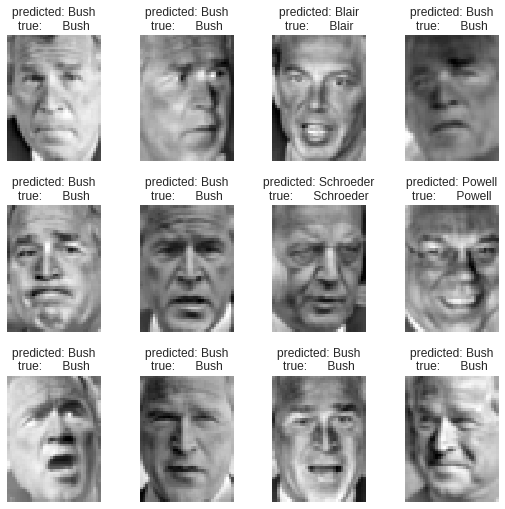

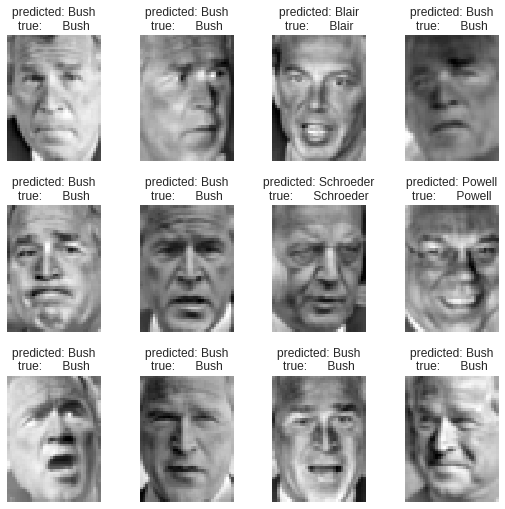

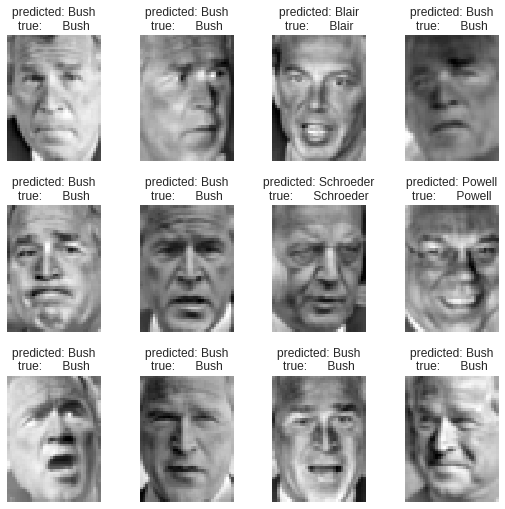

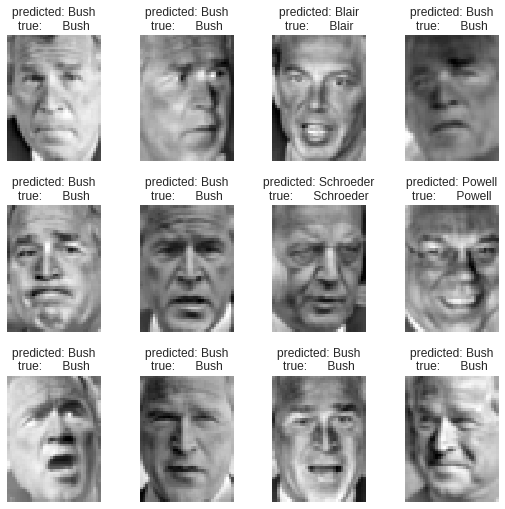

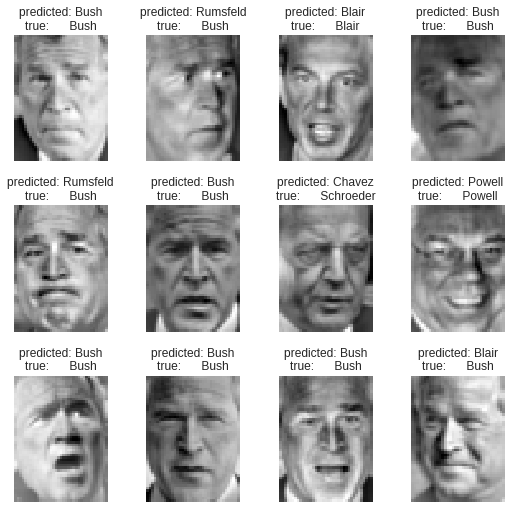

In [49]:
for j in range(len(un_predict_array)):
  unprediction_titles_new = [title(un_predict_array[j], un_y_test, target_names, i)
                           for i in range(un_predict_array[j].shape[0])]

  plot_gallery(un_X_test, unprediction_titles_new, hh, ww)

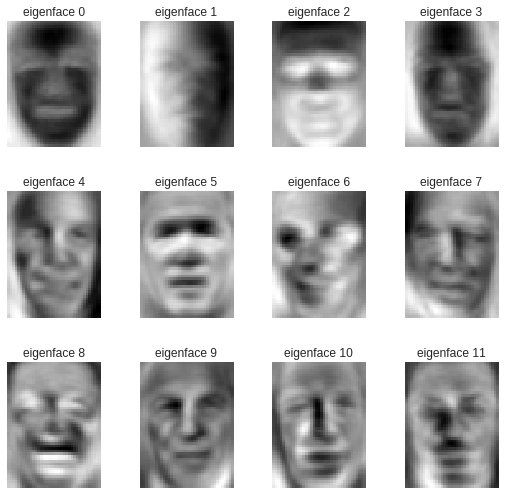

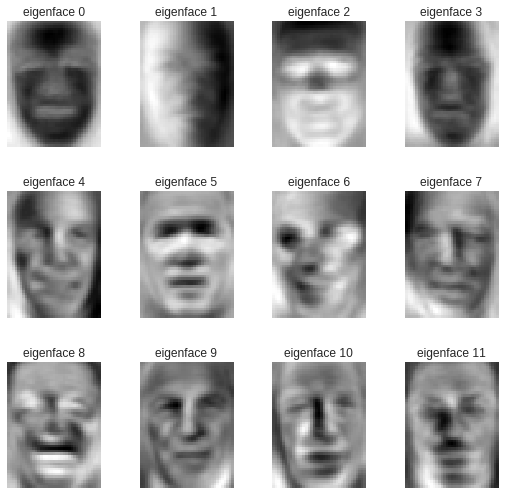

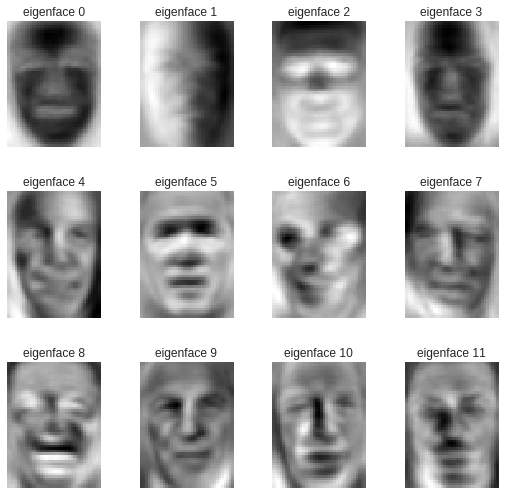

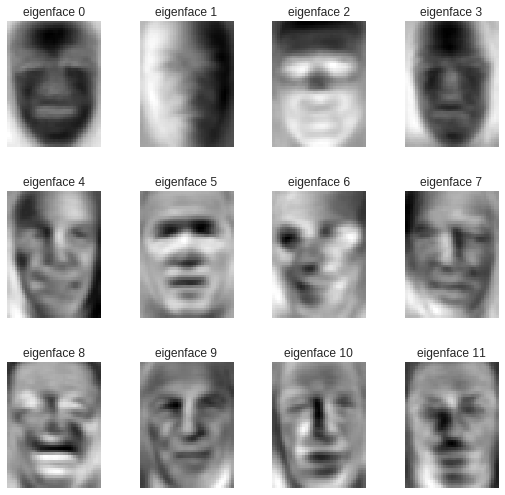

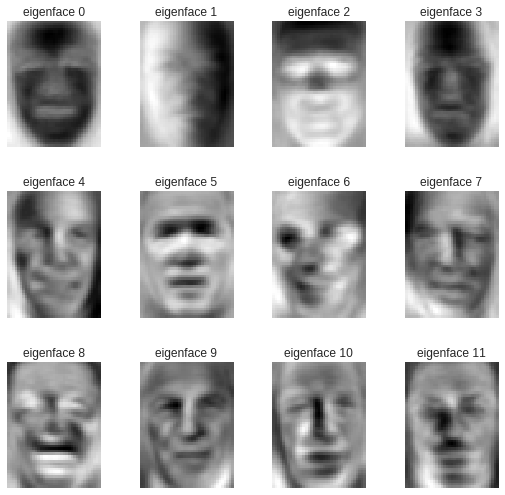

In [50]:
# plot the gallery of the most significative eigenfaces
for j in range(len(un_eigenfaces_array)):
  uneigenface_titles_new = ["eigenface %d" % i for i in range(un_eigenfaces_array[j].shape[0])]
  plot_gallery(un_eigenfaces_array[j], uneigenface_titles_new, hh, ww)

plt.show()

##Point 7
*After Compare the Eigenfaces plotted in the last part of the tutorial for both the ‘funneled’ and ‘unfunneled’ datasets, We found out that ,the unfunneled dataset in its normal and Eigen faces have a problem in alignment so, you will find some faces that is not totally centered and symmetric and some of them is rotated for inside. For example,we noticed that there is an eye that is -lower- than an eye or a face that has an empty part in the left side but no emptiness on the right.*

##Point 8
*CPU runtime: done extracts in 207.667s
GPU runtime : done extracts in 209.074s
and the TPU runtime: done extracts  in 289.518s *

##**Task 2**

###Part 1-a

In [0]:
xtrain = pd.read_csv("./14cancer_xtrain_1.csv")
xtest = pd.read_csv("./14cancer_xtest_1.csv")

ytrain = pd.read_csv("./14cancer_ytrain_1.csv")
ytest = pd.read_csv("./14cancer_ytest_1.csv")

In [0]:
xtrain = xtrain.as_matrix()
xtrain = xtrain.transpose()

ytrain = ytrain.as_matrix()
ytrain = ytrain.transpose()

xtest = xtest.as_matrix()
xtest = xtest.transpose()

ytest = ytest.as_matrix()
ytest = ytest.transpose()

###Part 1-b

In [0]:
xtrain = preprocessing.scale(xtrain)
xtest = preprocessing.scale(xtest)

# classifier = SVC(C=20, kernel='linear')

# classifier.fit(xtrain, ytrain)

# fpca = func_pca([90, 95, 100, 105, 110, 115, 120, 125], xtrain, xtest, ytrain, ytest)

In [54]:
h,w = xtrain.shape
print(h)
print(w)

144
16063


In [0]:
#################################################################
# n_components =  [50, 150, 190, 300, 700]
def pca_nada(Xtrain, Xtest, Ytrain, Ytest):
    n_components = [90, 95, 100, 105, 110, 115, 120, 125]
    c_array = []
    train_set = []
    average_test = []
    eigenfaces_array = []
    predict_array = [] # test_score array
    average_train = []
    train_score = []

    for i in range(len(n_components)):
        print("Extracting the top %d eigenfaces from %d faces"
            % (n_components[i], Xtrain.shape[0]))
        t0 = time()
        pca = PCA(n_components = n_components[i], svd_solver='randomized',
                  whiten=True).fit(Xtrain)

        sum_all=0
        match=0
        
        sum_all2=0
        match2=0

        eigenfaces = pca.components_
        eigenfaces_array.append(eigenfaces)

        t0 = time()
        x_train_pca = pca.transform(Xtrain)
        x_test_pca = pca.transform(Xtest)


        t0 = time()
        param_grid = {'C': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 1e3],
                      'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.005, 0.1], }
        clf_new = GridSearchCV(SVC(kernel='rbf', class_weight='balanced', shrinking=False),
                                   param_grid, cv=5)

        clf_new = clf_new.fit(x_train_pca, Ytrain)

        y_pred_new = clf_new.predict(x_test_pca)
        predict_array.append(y_pred_new)
        
        print(clf_new)
        
#         y_pred_train = clf_new.predict(x_train_pca)
#         train_score.append(y_pred_train)
        
        
#         #calculate score train set
#         for ii in range(0,len(y_pred_train)):
#           sum_all2=len(y_pred_train)
#           if y_pred_train[ii]==Xtrain[ii]:
#             match2+=1
#         average_train.append(match2/sum_all2)
        

        #calculate accuracy
        for ii in range(0,len(y_pred_new)):
          sum_all=len(y_pred_new)
          if y_pred_new[ii]==Ytest[ii]:
            match+=1
        average_test.append(match/sum_all)

        c_value = clf_new.best_estimator_.C
        c_array.append(c_value)
        print(c_value)
        
        clf_best = clf_new.best_score_
        average_train.append(clf_best)

    print("done in %0.3fs" % (time() - t0))
    print("Done.....")
    return n_components,c_array,average_test,predict_array,eigenfaces_array,average_train

In [56]:
#################################################################
# comp=[90, 95, 100, 105, 110, 115, 120, 125]
pca_nada_result = pca_nada( xtrain, xtest, ytrain, ytest)



Extracting the top 90 eigenfaces from 144 faces


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=False,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 1000.0], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.005, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
90
Extracting the top 95 eigenfaces from 144 faces


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=False,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 1000.0], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.005, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
120
Extracting the top 100 eigenfaces from 144 faces


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=False,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 1000.0], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.005, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
110
Extracting the top 105 eigenfaces from 144 faces


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=False,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 1000.0], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.005, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
80
Extracting the top 110 eigenfaces from 144 faces


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=False,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 1000.0], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.005, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
120
Extracting the top 115 eigenfaces from 144 faces


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=False,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 1000.0], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.005, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
90
Extracting the top 120 eigenfaces from 144 faces


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=False,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 1000.0], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.005, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
80
Extracting the top 125 eigenfaces from 144 faces


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=False,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 1000.0], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.005, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
70
done in 8.850s
Done.....


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [0]:
#################################################################
n_components = pca_nada_result[0]
c_array = pca_nada_result[1]
average_test = pca_nada_result[2] # test score array
predict_array_new = pca_nada_result[3] 
eigenfaces_array = pca_nada_result[4]
train_score = pca_nada_result[5] # train score array



2018-12-02 21:58:37,285 No handles with labels found to put in legend.


Text(0.5,1,'graph 2')

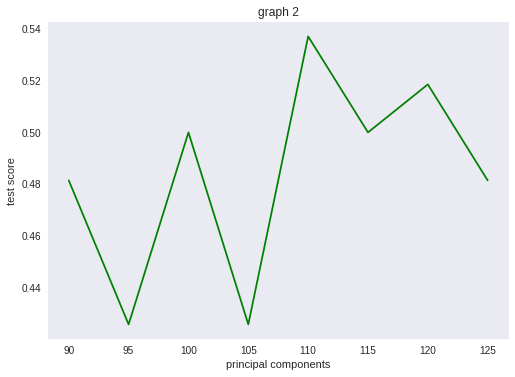

In [58]:
#################################################################
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])

plt.plot(n_components[:],average_test[:],c='g')
ax.grid()
ax.legend(loc='best')
ax.set_xlabel('principal components')
ax.set_ylabel('test score')
ax.set_title('graph 2')


2018-12-02 21:58:37,495 No handles with labels found to put in legend.


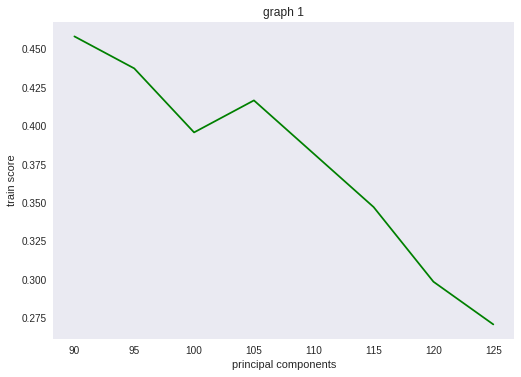

In [59]:
#################################################################
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])

plt.plot(n_components[:],train_score[:],c='g')
ax.grid()
ax.legend(loc='best')
ax.set_xlabel('principal components')
ax.set_ylabel('train score')
ax.set_title('graph 1')
  
plt.show()

###Part 1-c

####By looking at the graph, the classifier shows generalization, since in the training the results are not very accurate, and in the testing the results are not too low.

###Part 2

####We have used one vs rest. This was determined by the parameter "ovr" in the clf object.